# WeRateDog & Twitter Project

## Gather

#### Load Pacakge

In [306]:
import requests
import numpy as np
import os
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import seaborn as sb

# for graphs
import matplotlib.pyplot as plt                                      
plt.rc("font", size=14)
%matplotlib inline
from matplotlib import cm as cm
import seaborn as sns                                 

from IPython.display import display, Markdown
from IPython.display import Image

#### Load Data

In [307]:
# Read csv file data
df_twt_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
# Read prediction data programatically

folder_name = 'image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [7]:
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [8]:
with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [9]:
df_img_prediction  = pd.read_csv(url, sep='\t')
df_img_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


- [For Tweeter Developer IP]
- Apply for developer account : https://developer.twitter.com/en/docs/basics/developer-portal/overview
- Tweet data is stored in JSON format by Twitter. Getting tweet JSON data via tweet ID using Tweepy is described well in https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
- API.get_status https://www.geeksforgeeks.org/python-api-get_status-in-tweepy/

In [14]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
consumer_key = 'K84mKgbLkLFiU3QDL4UXWOoc0'
consumer_secret = 'qKJnHIol8wrSpyLa2mWyCQ6X7hMCNCJH4vXD92V2Kxf0hO2HiW'
access_token = '151061721-UOI60pa6FgQG7zf7NcgZPyhu3qd9bbhxgkGwCBhm'
access_secret = 'ucJKgBZzWgonBf6muOKuB1SKxTmSKrk66zjngTyRD4jj4'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# calling the api  
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [16]:
tweet_ids = df_twt_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Rate limit reached. Sleeping for: 691


Success
901: 758740312047005698
Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success


1153: 725786712245440512
Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 7189

Success
1402: 699434518667751424
Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
14

Success
1651: 683515932363329536
Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
16

Rate limit reached. Sleeping for: 700


Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
18

Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
20

Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
23

In [412]:
# Make data frame with gathered information
df_twt=pd.DataFrame(columns=['tweet_id','retweet_count','favorite_count'])
with open('tweet_json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        df_twt = df_twt.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                           columns = ['tweet_id','retweet_count','favorite_count']))
df_twt = df_twt.reset_index(drop=True)
df_twt

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7630,35923
1,892177421306343426,5643,30997
2,891815181378084864,3740,23317
3,891689557279858688,7798,39206
4,891327558926688256,8395,37454
...,...,...,...
2326,666049248165822465,40,96
2327,666044226329800704,130,269
2328,666033412701032449,41,111
2329,666029285002620928,42,120


In [338]:
df_twt.shape

(2331, 3)

## Assess

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

- Quality (content issue, dirty) : missing, duplicate, incorrect, corrupted
- Tidiness (structure issue, messy) : each variable forms a column, each observation forms a row
- can be done visually or programatically

##### df_twt_archive

In [475]:
# Display the archive_df table info
df_twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2030 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2030 non-null   object             
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              2030 non-null   datetime64[ns, UTC]
 4   source                 2030 non-null   object             
 5   text                   2030 non-null   object             
 6   expanded_urls          2030 non-null   object             
 7   rating_numerator       2030 non-null   object             
 8   rating_denominator     2030 non-null   int64              
 9   name                   2030 non-null   object             
 10  dog_stage              2030 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. 

df_twt_archive columns:
- tweet_id : the unique identifier for each of the tweet
- in_reply_to_status_id : the status id for the reply given to the tweet id
- in_reply_to_user_id : the user id for the reply given to the tweet id
- timestamp	: time
- source	: URL
- text	: tweet text
- retweeted_status_id	: the status id for the reply given to the tweet id
- retweeted_status_user_id : the user id for the reply given to the tweet id	
- retweeted_status_timestamp : when the reply is given to the tweet id	
- expanded_urls	: expanded URL
- rating_numerator : the ranking given by the user
- rating_denominator : The reference ranking given by the user
- name	: dog's name
- doggo , floofer, pupper, puppo : breed of the dog

In [168]:
# Check missing value
df_twt_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [310]:
df_twt_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [23]:
df_twt_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [27]:
df_twt_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [11]:
df_twt_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [97]:
text = df_twt_archive['text'][100]
text

'Here are my favorite #dogsatpollingstations \nMost voted for a more consistent walking schedule and to increase daily pats tenfold. All 13/10 https://t.co/17FVMl4VZ5'

In [12]:
df_twt_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [311]:
# Check duplicates
df_twt_archive[df_twt_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### df_imag_prediction

In [476]:
df_img_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


Every image in the WeRateDogs Twitter archive were classified through a neural network. The table shows full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

So for the last row in that table:

- tweet_id: the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
- p1: the algorithm's #1 prediction for the image in the tweet → golden retriever
- p1_conf: how confident the algorithm is in its #1 prediction → 95%
- p1_dog: whether or not the #1 prediction is a breed of dog → TRUE
- p2: the algorithm's second most likely prediction → Labrador retriever
- p2_conf: how confident the algorithm is in its #2 prediction → 1%
- p2_dog: whether or not the #2 prediction is a breed of dog → TRUE
- p3: the algorithm's second most likely prediction → Labrador retriever
- p3_conf: how confident the algorithm is in its #3 prediction → 1%
- p3_dog: whether or not the #3 prediction is a breed of dog → TRUE

In [34]:
df_img_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [35]:
df_img_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [36]:
df_img_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [37]:
df_img_prediction.shape

(2075, 12)

In [38]:
df_img_prediction[df_img_prediction.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [39]:
df_img_prediction['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [40]:
df_img_prediction['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

##### df_twt

In [41]:
df_twt.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7630,35923
1,892177421306343426,5643,30997
2,891815181378084864,3740,23317
3,891689557279858688,7798,39206
4,891327558926688256,8395,37454


We gathered tweeter data of tweet IDs in df_twt_archive table:

- tweet_id: the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
- rewtweets: how many times the postings were retweeted
- favorites: the number of favorites
- friends: the number of friends

In [42]:
df_twt.describe()

,tweet_id,retweet_count,favorite_count
count,2331,2331,2331
unique,2331,1684,1995
top,668992363537309700,516,0
freq,1,6,163


In [43]:
df_twt.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [44]:
df_twt[df_twt.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


#### Quality and Tideniss issues of the tables


[Quality issues]
- In Tweet archive data, there's information about retweet status. In case retweet_id is not empty, it's duplicated information. (1 - df_twt_archive)
- There were some data missing expanded urls, meaning that we're not able to know where this data comes from. (2 - df_twt_archive)
- There were corrupted data in name columns such as 'a', 'the', 'such', 'very etc.(3 - df_twt_archive)
- In case rating is not 10, there are cases where they are valid ratings and there are also invalid ones.(4 - df_twt_archive)
- There are some incorrect rating values when rating numerators contain decimals. (5 - df_twt_archive)
- Time information is not the type of time. (6 - df_twt_archive)
- There is 'None' value in dog instead of null. (7 - df_twt_archive)
- Tweet Id should be changed from object to string. (8 - df_twt_archive)


[Tideness issues]
- Dog stage information is distributed to three different columns.
- Three different tables give us difficulty to investigate and analyze the data properly.

## Clean

#### Define
Copy origitnal tables

#### Code

In [312]:
# copy original data
clean_df_twt_archive = df_twt_archive.copy()

In [50]:
clean_df_img = df_img_prediction.copy()

In [51]:
clean_df_twt = df_twt.copy()

In [411]:
clean_df_twt.head(3)

,tweet_id,retweet_count,favorite_count
0,b'892420643555336193',7630,35923
1,b'892177421306343426',5643,30997
2,b'891815181378084864',3740,23317


#### Test

In [313]:
clean_df_twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [53]:
clean_df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [87]:
clean_df_twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   object
 2   favorite_count  2331 non-null   object
dtypes: object(3)
memory usage: 54.8+ KB


#### Define
Quality 1. In order to avoid use duplicate date, remove the rows with non-empty retweeted_status_id, retweeted_status_user_id, or retweeted_status_timestamp, and remove the empty columns.

#### Code

In [433]:
df_twt_archive.shape

(2356, 17)

In [315]:
df_twt_archive[df_twt_archive.retweeted_status_id.isnull()].shape

(2175, 17)

In [434]:
# Remove non-empty rows (etweeted_status_id, retweeted_status_user_id, or retweeted_status_timestamp)
df_twt_archive = df_twt_archive[df_twt_archive['retweeted_status_id'].isnull()]
df_twt_archive = df_twt_archive[df_twt_archive['retweeted_status_timestamp'].isnull()]
df_twt_archive = df_twt_archive[df_twt_archive['retweeted_status_user_id'].isnull()]

In [435]:
# Remove empty columns
df_twt_archive = df_twt_archive.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [436]:
df_twt_archive.shape

(2175, 14)

In [319]:
df_twt_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


#### Define
Quality 2. we need to have expanded URLs for the analysis. Therefore, let's remove the columns having missing vaules in expanded_urls.

#### Code

In [320]:
df_twt_archive.shape

(2175, 14)

In [437]:
df_twt_archive.expanded_urls.isna().sum()

58

In [438]:
df_twt_archive = df_twt_archive.dropna(subset=['expanded_urls'], how='any')

#### Test

In [439]:
df_twt_archive.shape

(2117, 14)

#### Define
Quality 3. Delete rows with corrupted or missing value in name such as 'a','the','such','very','quite'.

#### Code

In [440]:
df_twt_archive.name.sort_values().value_counts()

None       622
a           55
Lucy        11
Charlie     11
Cooper      10
          ... 
Monty        1
Blue         1
Pancake      1
Chesney      1
Beckham      1
Name: name, Length: 956, dtype: int64

In [441]:
df_twt_archive.drop(df_twt_archive[(df_twt_archive['name'] == 'a')|
                                  (df_twt_archive['name'] == 'the')|
                                  (df_twt_archive['name'] == 'such')|
                                  (df_twt_archive['name'] == 'very')|
                                  (df_twt_archive['name'] == 'quite')|
                                  (df_twt_archive['name'] == 'this')|
                                  (df_twt_archive['name'] == 'unacceptable')|
                                  (df_twt_archive['name'] == 'one')|
                                  (df_twt_archive['name'] == 'officially')|
                                  (df_twt_archive['name'] == 'not')|
                                  (df_twt_archive['name'] == 'old')|
                                  (df_twt_archive['name'] == 'my')|
                                  (df_twt_archive['name'] == 'just')|
                                  (df_twt_archive['name'] == 'mad')|
                                  (df_twt_archive['name'] == 'infuriating')].index, inplace = True)

#### Test

In [442]:
df_twt_archive.name.sort_values()

1035          Abby
1021          Abby
938            Ace
1933          Acro
1327         Adele
           ...    
992            his
542     incredibly
1916          life
2001         light
2030         space
Name: name, Length: 2030, dtype: object

In [327]:
df_twt_archive.shape

(2030, 14)

#### Define
Quality 4. Find incorrect rating values which are not 10, and correct them with right information.

#### Code

In [445]:
# Create a new dataframe with just tweet_id, text, rating_numerator and rating_denominator
rating_df = df_twt_archive.drop(['in_reply_to_status_id','in_reply_to_user_id','timestamp','source','expanded_urls','name',
 'doggo','floofer','pupper','puppo'],axis=1)

In [446]:
# Filter new dataframe to include only denominators not equal to expected 10
rating_df = rating_df[rating_df.rating_denominator != 10]

In [447]:
# Set the column width in pandas so the full tweet text can be read for analysis
pd.set_option("display.max_colwidth",280)

In [448]:
# Display full dataframe
rating_df

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40


In [449]:
# Reading the text of Tweet_id 666287406224695296 - the correct value should be 9/10
# Change numerator and denominator rating scores in master dataframe df1

df_twt_archive.loc[df_twt_archive.tweet_id == 716439118184652801, 'rating_numerator'] = 11
df_twt_archive.loc[df_twt_archive.tweet_id == 716439118184652801, 'rating_denominator'] = 10

df_twt_archive.loc[df_twt_archive.tweet_id == 682962037429899265, 'rating_numerator'] = 10
df_twt_archive.loc[df_twt_archive.tweet_id == 682962037429899265, 'rating_denominator'] = 10

df_twt_archive.loc[df_twt_archive.tweet_id == 666287406224695296, 'rating_numerator'] = 9
df_twt_archive.loc[df_twt_archive.tweet_id == 666287406224695296, 'rating_denominator'] = 10

#### Test

In [450]:
df_twt_archive[df_twt_archive.tweet_id==682962037429899265]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,10,10,Darrel,None,None,None,None


In [451]:
df_twt_archive[df_twt_archive.tweet_id==666287406224695296]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,10,an,None,None,None,None


In [452]:
df_twt_archive[df_twt_archive.tweet_id==716439118184652801]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,10,Bluebert,None,None,None,None


#### Define
Quality 5. Check incorrect rating values, and clean those values.

#### Code

In [453]:
# Change data type
df_twt_archive['rating_numerator'] = df_twt_archive['rating_numerator'].astype(float)

In [297]:
df_twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2030 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2030 non-null   int64              
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              2030 non-null   datetime64[ns, UTC]
 4   source                 2030 non-null   object             
 5   text                   2030 non-null   object             
 6   expanded_urls          2030 non-null   object             
 7   rating_numerator       2030 non-null   float64            
 8   rating_denominator     2030 non-null   int64              
 9   name                   2030 non-null   object             
 10  doggo                  2030 non-null   object             
 11  floofer                2030 non-null   object           

In [454]:
ratings = df_twt_archive.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [455]:
df_twt_archive.rating_numerator = ratings

#### Test

In [456]:
df_twt_archive[df_twt_archive.tweet_id==786709082849828864]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,None,None,None,None


In [329]:
df_twt_archive.rating_numerator.sort_values()

315        0
1016       0
2261       1
2091       1
1869       1
        ... 
1634     143
1779     144
902      165
2074     420
979     1776
Name: rating_numerator, Length: 2030, dtype: int64

#### Define
Quality 6. Timestamp field is converted into the appropriate data type 

#### Code

In [457]:
df_twt_archive['timestamp'] = pd.to_datetime(df_twt_archive['timestamp'], dayfirst=True)

#### Test

In [458]:
df_twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2030 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2030 non-null   int64              
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              2030 non-null   datetime64[ns, UTC]
 4   source                 2030 non-null   object             
 5   text                   2030 non-null   object             
 6   expanded_urls          2030 non-null   object             
 7   rating_numerator       2030 non-null   object             
 8   rating_denominator     2030 non-null   int64              
 9   name                   2030 non-null   object             
 10  doggo                  2030 non-null   object             
 11  floofer                2030 non-null   object           

#### Define 
Quality 7. Change NA > Nulls in doggo, floofer, pupper, puppo columns of df_twt_archive to merged the tables

#### Code

In [459]:
# Change None to Null
df_twt_archive.doggo.replace('None', '', inplace=True)
df_twt_archive.floofer.replace('None', '', inplace=True)
df_twt_archive.pupper.replace('None', '', inplace=True)
df_twt_archive.puppo.replace('None', '', inplace=True)

#### Test

In [460]:
df_twt_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,,,,


#### Define
Quality 8. Tweet Id should be changed from object to string.

#### Code

In [478]:
df_twt_archive["tweet_id"] = df_twt_archive["tweet_id"].astype(str)

#### Test

In [479]:
df_twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2030 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2030 non-null   object             
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              2030 non-null   datetime64[ns, UTC]
 4   source                 2030 non-null   object             
 5   text                   2030 non-null   object             
 6   expanded_urls          2030 non-null   object             
 7   rating_numerator       2030 non-null   object             
 8   rating_denominator     2030 non-null   int64              
 9   name                   2030 non-null   object             
 10  dog_stage              2030 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(

#### Define
Tideness1. Dog_stage information is distributed in three different columns. Let's make one column

#### Code

In [461]:
# merge 4 columns to 1 column
df_twt_archive['dog_stage'] = df_twt_archive.doggo + df_twt_archive.floofer + df_twt_archive.pupper + df_twt_archive.puppo

In [462]:
# handle multiple stages
df_twt_archive.loc[df_twt_archive.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_twt_archive.loc[df_twt_archive.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_twt_archive.loc[df_twt_archive.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [463]:
# Drop doggo, floofer, pupper, puppo columns and leave only dog_staage column
columns = ['doggo', 'floofer','pupper','puppo']
df_twt_archive.drop(columns, inplace=True, axis=1)

#### Test

In [464]:
df_twt_archive.dog_stage.value_counts()

                  1703
pupper             213
doggo               71
puppo               23
doggo, pupper        9
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

In [465]:
df_twt_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,


#### Define
Tideness 2. Merge 3 different tables to 1 table

#### Code

In [468]:
df_merge = pd.merge(df_twt_archive,
                    df_twt[['tweet_id','retweet_count','favorite_count']], 
                    on='tweet_id', how='left')

In [469]:
df_merge.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,,7630,35923
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,,5643,30997
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,,3740,23317
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,,7798,39206


In [470]:
df_merge.shape

(2030, 13)

In [471]:
df_merge2 = pd.merge(df_merge,
                    df_img_prediction, 
                    on='tweet_id', how='left')

In [472]:
df_img_prediction.tweet_id.duplicated().sum()

0

In [473]:
df_merge2.dog_stage.value_counts()

                  1703
pupper             213
doggo               71
puppo               23
doggo, pupper        9
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

In [474]:
df_merge2.shape

(2030, 24)

#### Test

In [46]:
df_merge2.dog_stage.value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

### Analysis & Visualization

#### Store

In [485]:
df_merge2.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [486]:
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2030 entries, 0 to 2029
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2030 non-null   object             
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              2030 non-null   datetime64[ns, UTC]
 4   source                 2030 non-null   object             
 5   text                   2030 non-null   object             
 6   expanded_urls          2030 non-null   object             
 7   rating_numerator       2030 non-null   object             
 8   rating_denominator     2030 non-null   int64              
 9   name                   2030 non-null   object             
 10  dog_stage              2030 non-null   object             
 11  retweet_count          2023 non-null   object           

#### Analysis & Visualization

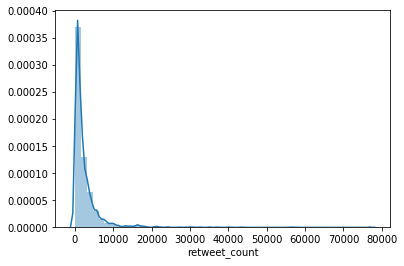

In [488]:
sb.distplot(df_merge2['retweet_count']);

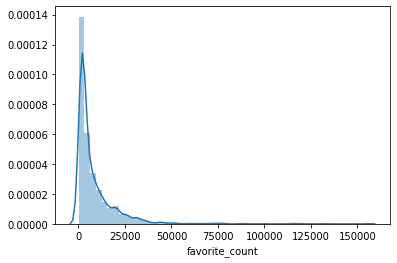

In [489]:
sb.distplot(df_merge2['favorite_count']);

- Retweet and Favorites shows similar pattern.

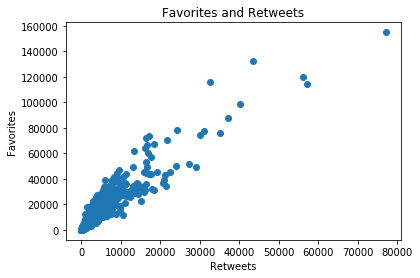

In [499]:
plt.scatter(data=df_merge2, x='retweet_count', y='favorite_count')
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites');

- Retweets and Favorites are correlated. In other words, people who retweeted the posts have also done with favorites.

In [492]:
df_merge2.rating_numerator.value_counts()

12       479
10       418
11       402
13       289
9        142
8         92
7         46
14        36
5         32
6         30
3         18
4         13
2          8
1          5
0          2
144        1
84         1
45         1
11.27      1
1776       1
143        1
50         1
88         1
121        1
44         1
80         1
11.26      1
13.5       1
24         1
420        1
99         1
9.75       1
165        1
Name: rating_numerator, dtype: int64

In [493]:
df_merge2.rating_numerator.describe()

count     2030
unique      33
top         12
freq       479
Name: rating_numerator, dtype: object

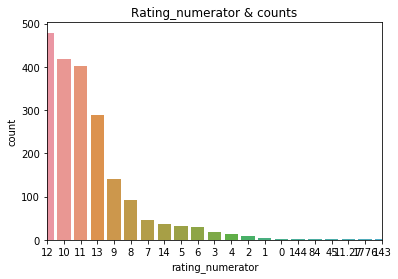

In [497]:
sb.countplot(data = df_merge2, x='rating_numerator', order=order)
plt.title("Rating_numerator & counts")
plt.xlim((0,20));

In [496]:
order = df_merge2['rating_numerator'].value_counts().index

- The most frequent rating cusomters set is 12 and majority of people set ratings between 7 to 14.

In [500]:
df_merge2.dog_stage.value_counts()

                  1703
pupper             213
doggo               71
puppo               23
doggo, pupper        9
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

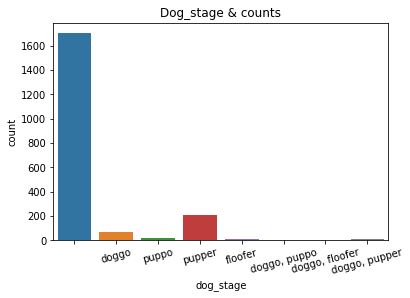

In [501]:
# Top Dog_stage values based on the count
sb.countplot(data = df_merge2, x='dog_stage')
plt.title("Dog_stage & counts")
plt.xticks(rotation=15);

- Majority of tweets are not recognized with specific dog_stage. Among specified dog stage pupper has the largest number.

df_img_prediction.jpg_url[df_img_prediction.tweet_id == '820690176645140481']

In [510]:
df_img_prediction.jpg_url[df_img_prediction.tweet_id == '820690176645140481']

1728    https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg
Name: jpg_url, dtype: object

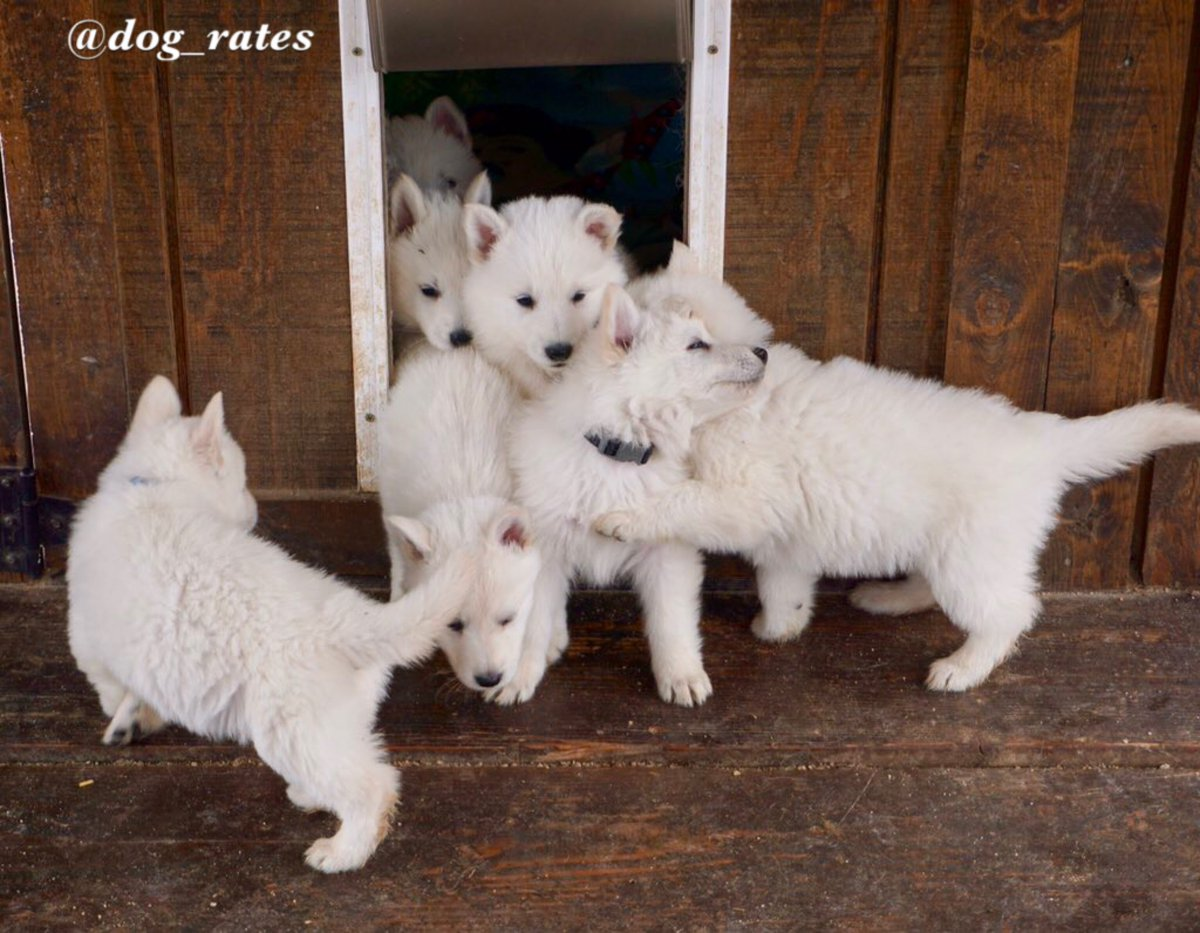

In [511]:
Image("https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg")

In [520]:
df_merge2.dog_stage.value_counts()

                  1703
pupper             213
doggo               71
puppo               23
doggo, pupper        9
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

In [524]:
df_merge2[(df_merge2.dog_stage == 'doggo') & (df_merge2.rating_numerator == '10')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
252,834089966724603904,NaN,NaN,2017-02-21 17:18:39+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",DOGGO ON THE LOOSE I REPEAT DOGGO ON THE LOOSE 10/10 https://t.co/ffIH2WxwF0,https://twitter.com/stevekopack/status/834086676934836224,10,10,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,780074436359819264,NaN,NaN,2016-09-25 16:00:13+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Here's a doggo questioning his entire existence. 10/10 someone tell him he's a good boy https://t.co/dVm5Hgdpeb,https://vine.co/v/5nzYBpl0TY2,10,10,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
702,757393109802180609,NaN,NaN,2016-07-25 01:52:43+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo completely oblivious to the double rainbow behind him. 10/10 someone tell him https://t.co/OfvRoD6ndV,"https://twitter.com/dog_rates/status/757393109802180609/photo/1,https://twitter.com/dog_rates/status/757393109802180609/photo/1,https://twitter.com/dog_rates/status/757393109802180609/photo/1,https://twitter.com/dog_rates/status/757393109802180609/photo/1",10,10,None,...,2.0,Labrador_retriever,0.787125,True,Chesapeake_Bay_retriever,0.112676,True,Rottweiler,0.048039,True
728,752682090207055872,NaN,NaN,2016-07-12 01:52:49+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Nothing better than a doggo and a sunset. 10/10 majestic af https://t.co/xVSodF19PS,"https://twitter.com/dog_rates/status/752682090207055872/photo/1,https://twitter.com/dog_rates/status/752682090207055872/photo/1",10,10,None,...,2.0,German_shepherd,0.299966,True,Eskimo_dog,0.278355,True,Siberian_husky,0.178520,True
729,752660715232722944,NaN,NaN,2016-07-12 00:27:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Hooman used Pokeball\n*wiggle*\n*wiggle*\nDoggo broke free \n10/10 https://t.co/bWSgqnwSHr,"https://twitter.com/dog_rates/status/752660715232722944/photo/1,https://twitter.com/dog_rates/status/752660715232722944/photo/1",10,10,None,...,2.0,goose,0.339324,False,English_setter,0.050512,True,basset,0.049093,True
773,748692773788876800,NaN,NaN,2016-07-01 01:40:41+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",That is Quizno. This is his beach. He does not tolerate human shenanigans on his beach. 10/10 reclaim ur land doggo https://t.co/vdr7DaRSa7,https://twitter.com/dog_rates/status/748692773788876800/photo/1,10,10,his,...,1.0,ox,0.337871,False,plow,0.269287,False,oxcart,0.245653,False
804,745433870967832576,NaN,NaN,2016-06-22 01:50:58+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lenox. She's in a wheelbarrow. Silly doggo. You don't belong there. 10/10 would push around https://t.co/oYbVR4nBsR,"https://twitter.com/dog_rates/status/745433870967832576/photo/1,https://twitter.com/dog_rates/status/745433870967832576/photo/1,https://twitter.com/dog_rates/status/745433870967832576/photo/1",10,10,Lenox,...,1.0,barrow,0.999962,False,basset,0.000014,True,wok,0.000006,False
941,719991154352222208,NaN,NaN,2016-04-12 20:50:42+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This doggo was initially thrilled when she saw the happy cartoon pup but quickly realized she'd been deceived. 10/10 https://t.co/mvnBGaWULV,"https://twitter.com/dog_rates/status/719991154352222208/photo/1,https://twitter.com/dog_rates/status/719991154352222208/photo/1",10,10,None,...,2.0,golden_retriever,0.605304,True,cocker_spaniel,0.130948,True,Labrador_retriever,0.094692,True


In [525]:
df_img_prediction.jpg_url[df_img_prediction.tweet_id == '757393109802180609']

1327    https://pbs.twimg.com/media/CoLNAq6WAAAkmdJ.jpg
Name: jpg_url, dtype: object

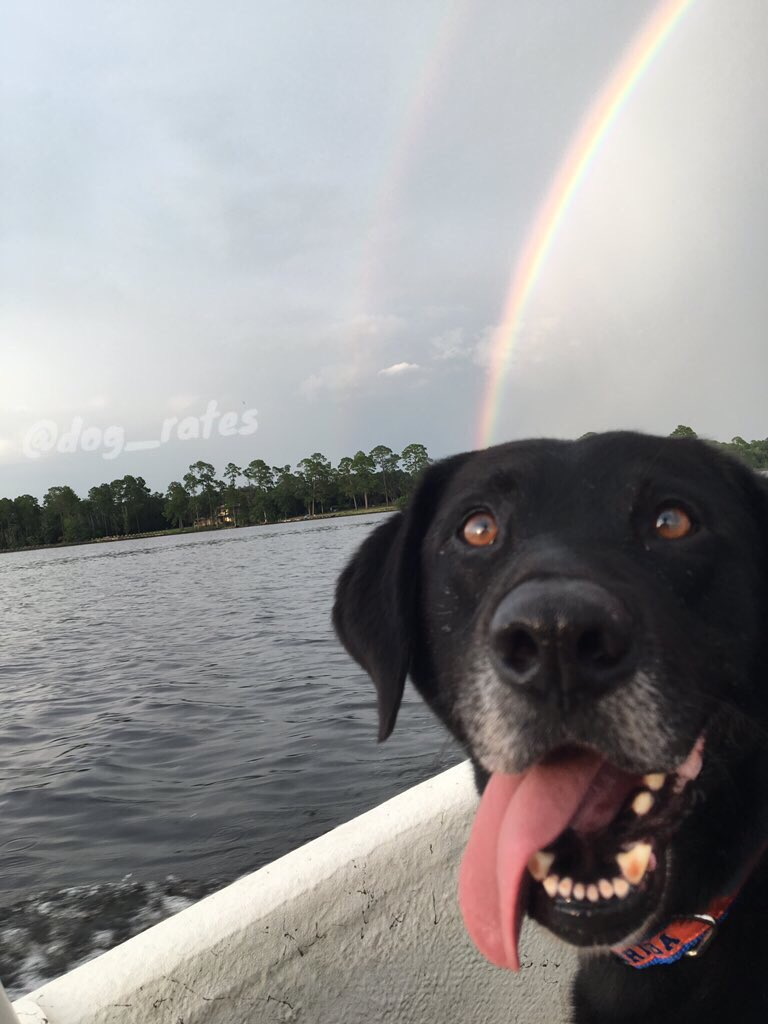

In [526]:
Image("https://pbs.twimg.com/media/CoLNAq6WAAAkmdJ.jpg")

In [527]:
df_img_prediction.jpg_url[df_img_prediction.tweet_id == '752660715232722944']

1300    https://pbs.twimg.com/media/CnH87L6XYAAF7I_.jpg
Name: jpg_url, dtype: object

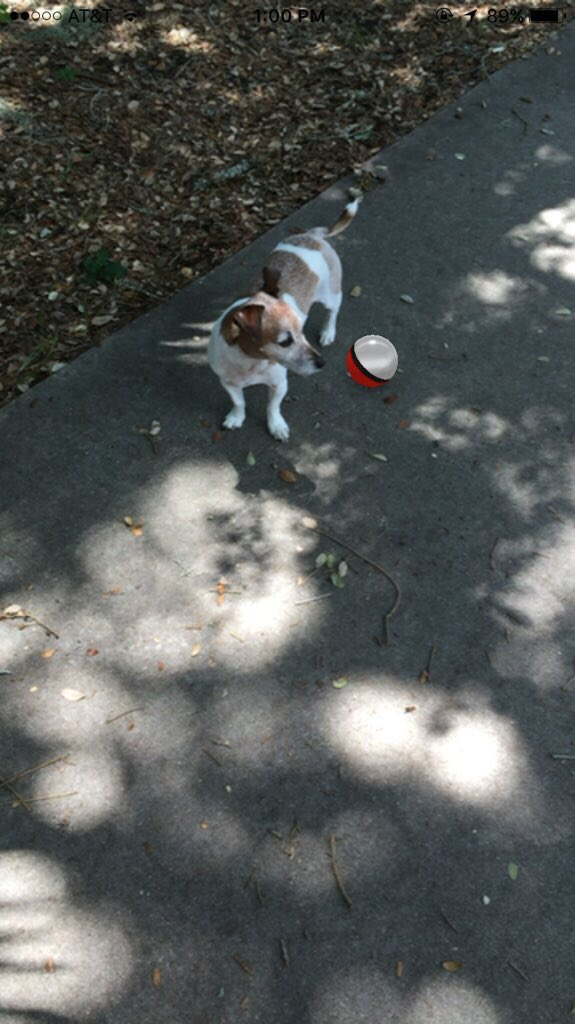

In [528]:
Image("https://pbs.twimg.com/media/CnH87L6XYAAF7I_.jpg")